In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import pickle
from matplotlib.ticker import MaxNLocator

# Utils

In [2]:
def provide_stat(data):
    avg = np.mean(data)
    med = np.median(data)
    std = np.std(data)

    print(f"The average is {avg}")
    print(f"The median is {med}")
    print(f"The standard deviation is {std}")

    return avg, med, std

# u need this bc there are instances that only one of the groups were present 
def keep_only_numbers(input_list):
    """
    This function takes a list and returns a new list containing only the numeric elements from the original list.

    :param input_list: List of elements
    :return: List containing only numbers
    """
    return [item for item in input_list if item != 'NA']

# Load the test result

Dynamic viscosity

In [7]:
with open(f"generality_test_dynamic_viscosity.pkl", "rb") as f:
    dv_results = pickle.load(f)

rmse_dv_standard_rf = dv_results['rmse_standard_rf']
rmse_dv_sim_ml = dv_results['rmse_sim_ml']
rmse_dv_tl = dv_results['rmse_tl']
n_features_dv_standard_rf = dv_results['n_features_standard_rf']
n_features_dv_sim_ml_group1 = dv_results['n_features_sim_ml_group1']
n_features_dv_sim_ml_group3 = dv_results['n_features_sim_ml_group3']
n_features_dv_tl = dv_results['n_features_tl']

In [8]:
count = 0
for idx, rmse_tl in enumerate(rmse_dv_tl):
    rmse_standad_rf = rmse_dv_standard_rf[idx]
    rmse_sim_ml = rmse_dv_sim_ml[idx]
    if rmse_tl < rmse_standad_rf and rmse_tl < rmse_sim_ml:
        count += 0

print(f"TL was better than the two method {count} times")

TL was better than the two method 0 times


Solubility

In [13]:
with open(f"generality_test_solubility.pkl", "rb") as f:
    sol_results = pickle.load(f)

rmse_sol_standard_rf = sol_results['rmse_standard_rf']
rmse_sol_sim_ml = sol_results['rmse_sim_ml']
rmse_sol_tl = sol_results['rmse_tl']
n_features_sol_standard_rf = sol_results['n_features_standard_rf']
n_features_sol_sim_ml_group1 = sol_results['n_features_sim_ml_group1']
n_features_sol_sim_ml_group3 = sol_results['n_features_sim_ml_group3']
n_features_sol_tl = sol_results['n_features_tl']

In [14]:
count = 0
for idx, rmse_tl in enumerate(rmse_sol_tl):
    rmse_standad_rf = rmse_sol_standard_rf[idx]
    rmse_sim_ml = rmse_sol_sim_ml[idx]
    if rmse_tl < rmse_standad_rf and rmse_tl < rmse_sim_ml:
        count += 0

print(f"TL was better than the two method {count} times")

TL was better than the two method 0 times


# Dynamic viscosity data

Distribution of RMSE for each method

(1) Standard RF

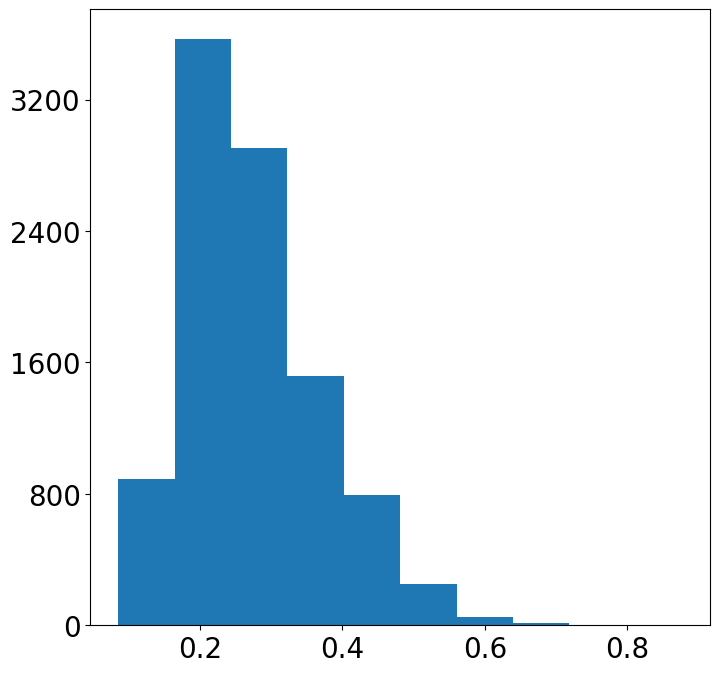

The average is 0.2740133953350541
The median is 0.25609954424360337
The standard deviation is 0.09489448571906178


In [15]:
plt.figure(figsize=[8,8])
plt.hist(rmse_dv_standard_rf)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20) 
# Getting the current axes
ax = plt.gca()
# # Setting the number of ticks on the x and y axes
ax.xaxis.set_major_locator(MaxNLocator(nbins=5)) # For x-axis, aiming for 5 ticks
ax.yaxis.set_major_locator(MaxNLocator(nbins=5)) # For y-axis, aiming for 5 ticks  
plt.show()
_,_,_ = provide_stat(rmse_dv_standard_rf)

(2) Similarity-based ML

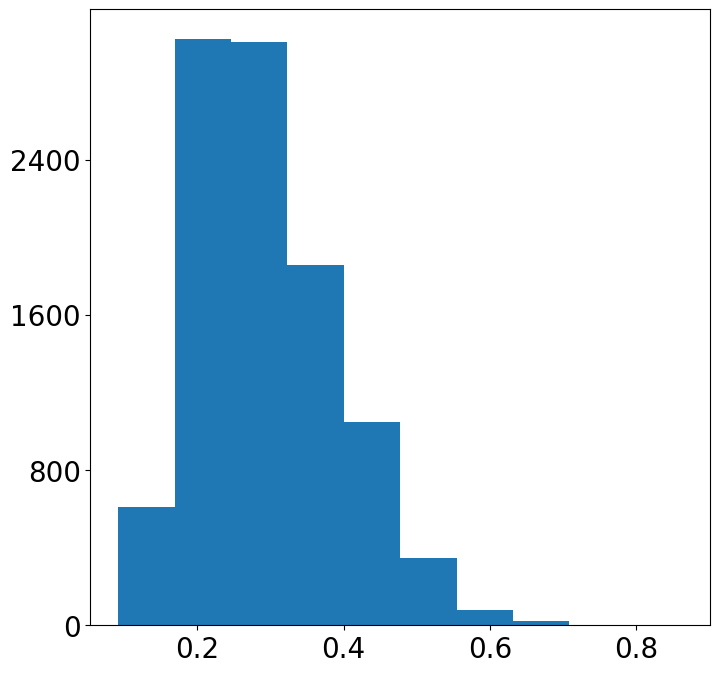

The average is 0.29393179223656657
The median is 0.277126967836803
The standard deviation is 0.09671688713545698


In [16]:
plt.figure(figsize=[8,8])
plt.hist(rmse_dv_sim_ml)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20) 
# Getting the current axes
ax = plt.gca()
# # Setting the number of ticks on the x and y axes
ax.xaxis.set_major_locator(MaxNLocator(nbins=5)) # For x-axis, aiming for 5 ticks
ax.yaxis.set_major_locator(MaxNLocator(nbins=5)) # For y-axis, aiming for 5 ticks  
plt.show()
_,_,_ = provide_stat(rmse_dv_sim_ml)

(3) Transfer Learning

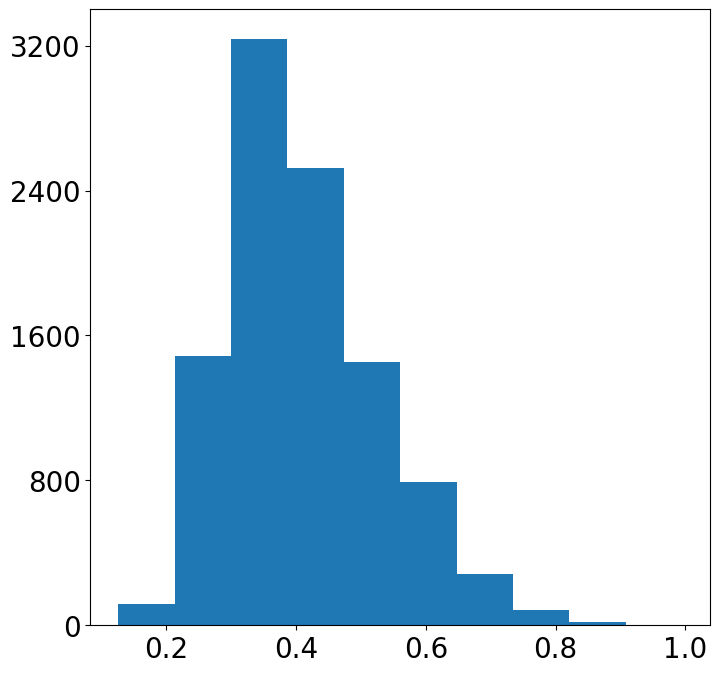

The average is 0.41117674684964134
The median is 0.3912168422863955
The standard deviation is 0.11618981995190686


In [17]:
plt.figure(figsize=[8,8])
plt.hist(rmse_dv_tl)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20) 
# Getting the current axes
ax = plt.gca()
# # Setting the number of ticks on the x and y axes
ax.xaxis.set_major_locator(MaxNLocator(nbins=5)) # For x-axis, aiming for 5 ticks
ax.yaxis.set_major_locator(MaxNLocator(nbins=5)) # For y-axis, aiming for 5 ticks  
plt.show()
_,_,_ = provide_stat(rmse_dv_tl)

Distribution of the differences of RMSEs between Similarity-based Ml and Standard RF: Similarity-based ML - Standard RF

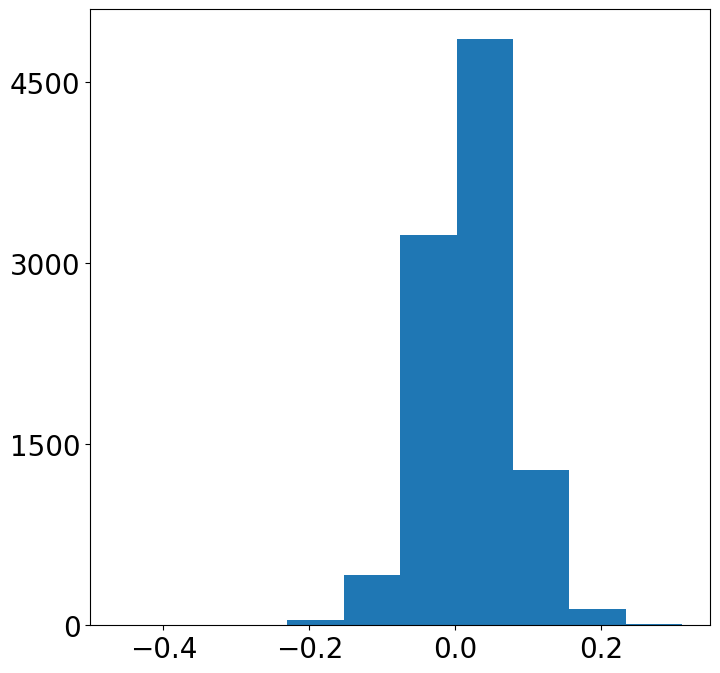

The average is 0.019918396901512543
The median is 0.01895737577324405
The standard deviation is 0.059233051872356515
3580 out of the 10000 instances similarity-based ML was better


In [18]:
plt.figure(figsize=[8,8])
plt.hist(np.array(rmse_dv_sim_ml)  - np.array(rmse_dv_standard_rf))
plt.xticks(fontsize=20)
plt.yticks(fontsize=20) 
# Getting the current axes
ax = plt.gca()

# Setting the number of ticks on the x and y axes
ax.xaxis.set_major_locator(MaxNLocator(nbins=5)) # For x-axis, aiming for 5 ticks
ax.yaxis.set_major_locator(MaxNLocator(nbins=5)) # For y-axis, aiming for 5 ticks     
plt.show()
_,_,_ = provide_stat(np.array(rmse_dv_sim_ml)  - np.array(rmse_dv_standard_rf))
print(f"{len(np.where(np.array(rmse_dv_sim_ml)  - np.array(rmse_dv_standard_rf) < 0)[0])} out of the 10000 instances similarity-based ML was better")

Distirubtion of number of used features for each method

(1) Standard RF

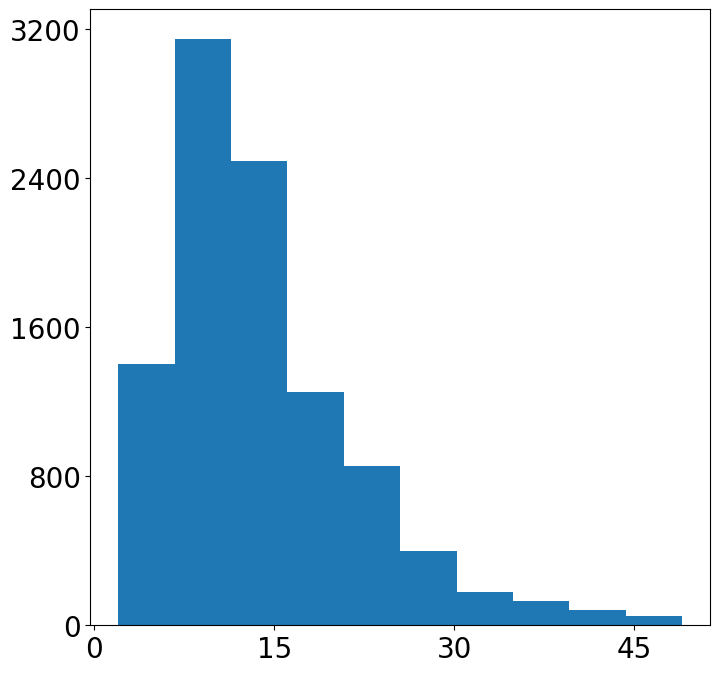

The average is 13.9571
The median is 12.0
The standard deviation is 7.9058370581488715


In [19]:
plt.figure(figsize=[8,8])
plt.hist(n_features_dv_standard_rf)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20) 
# Getting the current axes
ax = plt.gca()
# # Setting the number of ticks on the x and y axes
ax.xaxis.set_major_locator(MaxNLocator(nbins=5)) # For x-axis, aiming for 5 ticks
ax.yaxis.set_major_locator(MaxNLocator(nbins=5)) # For y-axis, aiming for 5 ticks  
plt.show()
_,_,_ = provide_stat(n_features_dv_standard_rf)

(2) Similarity-based ML - Group 1

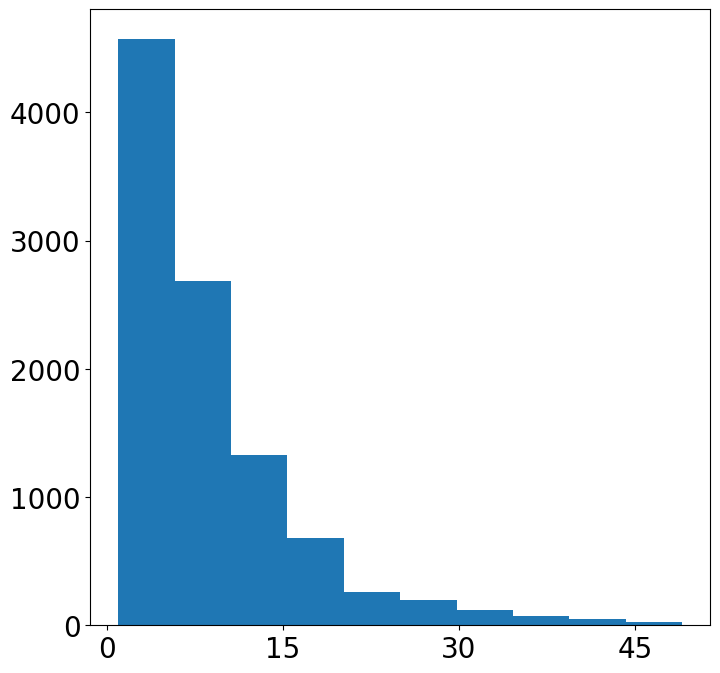

The average is 8.485439807865506
The median is 6.0
The standard deviation is 7.500853091960905


In [20]:
plt.figure(figsize=[8,8])
plt.hist(keep_only_numbers(n_features_dv_sim_ml_group1))
plt.xticks(fontsize=20)
plt.yticks(fontsize=20) 

# Getting the current axes
ax = plt.gca()
# # Setting the number of ticks on the x and y axes
ax.xaxis.set_major_locator(MaxNLocator(nbins=5)) # For x-axis, aiming for 5 ticks
ax.yaxis.set_major_locator(MaxNLocator(nbins=5)) # For y-axis, aiming for 5 ticks     
plt.show()
_,_,_ = provide_stat(keep_only_numbers(n_features_dv_sim_ml_group1))

(3) Similarity-based ML - Group 3

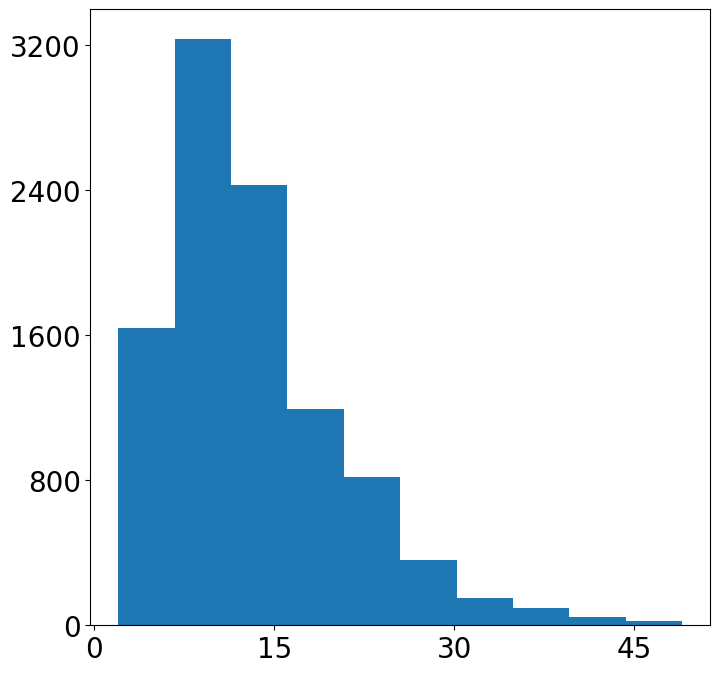

The average is 13.2349
The median is 12.0
The standard deviation is 7.381552816989118


In [21]:
plt.figure(figsize=[8,8])
plt.hist(keep_only_numbers(n_features_dv_sim_ml_group3))
plt.xticks(fontsize=20)
plt.yticks(fontsize=20) 

# Getting the current axes
ax = plt.gca()
# # Setting the number of ticks on the x and y axes
ax.xaxis.set_major_locator(MaxNLocator(nbins=5)) # For x-axis, aiming for 5 ticks
ax.yaxis.set_major_locator(MaxNLocator(nbins=5)) # For y-axis, aiming for 5 ticks     
plt.show()
_,_,_ = provide_stat(keep_only_numbers(n_features_dv_sim_ml_group3))

(4) Transfer Learning

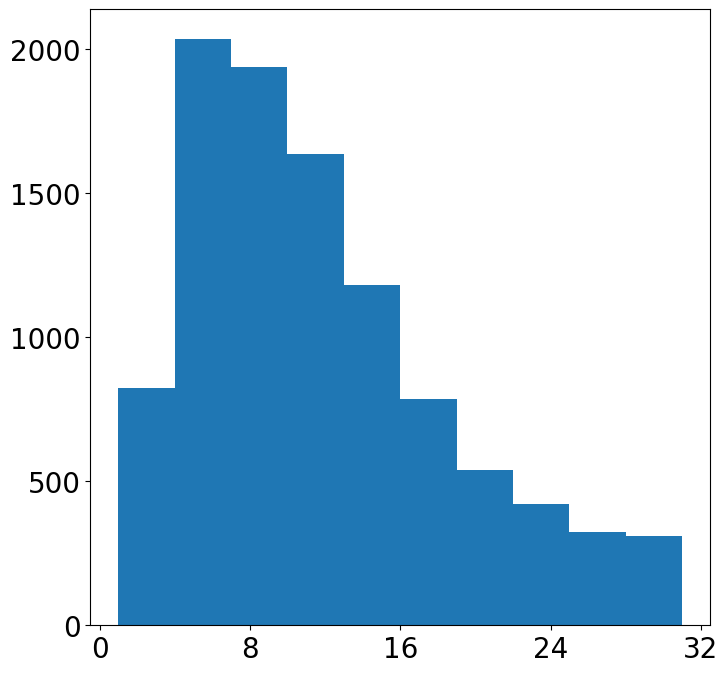

The average is 11.3287
The median is 10.0
The standard deviation is 6.883694960557157


In [22]:
plt.figure(figsize=[8,8])
plt.hist(keep_only_numbers(n_features_dv_tl))
plt.xticks(fontsize=20)
plt.yticks(fontsize=20) 

# Getting the current axes
ax = plt.gca()
# # Setting the number of ticks on the x and y axes
ax.xaxis.set_major_locator(MaxNLocator(nbins=5)) # For x-axis, aiming for 5 ticks
ax.yaxis.set_major_locator(MaxNLocator(nbins=5)) # For y-axis, aiming for 5 ticks     
plt.show()
_,_,_ = provide_stat(keep_only_numbers(n_features_dv_tl))

# Solubility data

Distribution of RMSE for each method

(1) Standard RF

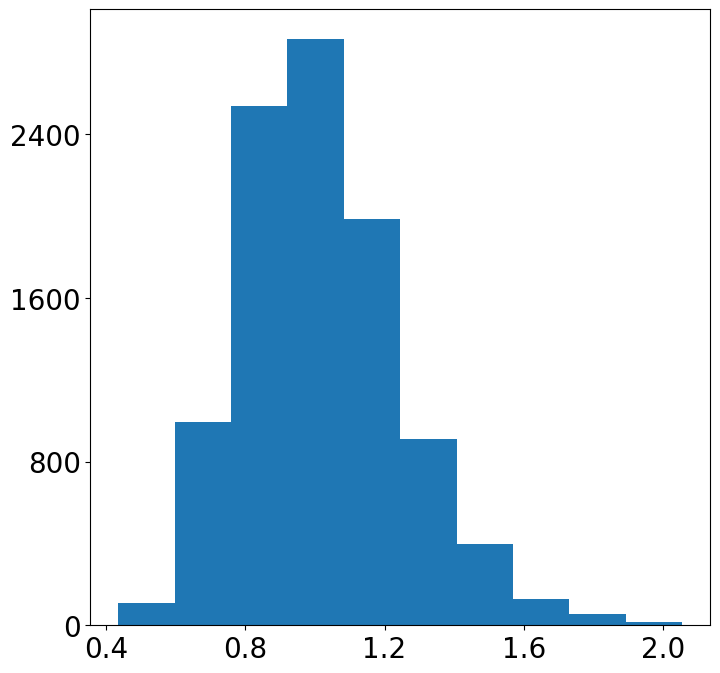

The average is 1.0188945143264019
The median is 0.9934522645689122
The standard deviation is 0.22819108044347783


In [23]:
plt.figure(figsize=[8,8])
plt.hist(rmse_sol_standard_rf)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20) 
# Getting the current axes
ax = plt.gca()
# # Setting the number of ticks on the x and y axes
ax.xaxis.set_major_locator(MaxNLocator(nbins=5)) # For x-axis, aiming for 5 ticks
ax.yaxis.set_major_locator(MaxNLocator(nbins=5)) # For y-axis, aiming for 5 ticks  
plt.show()
_,_,_ = provide_stat(rmse_sol_standard_rf)

(2) Similarity-based ML 

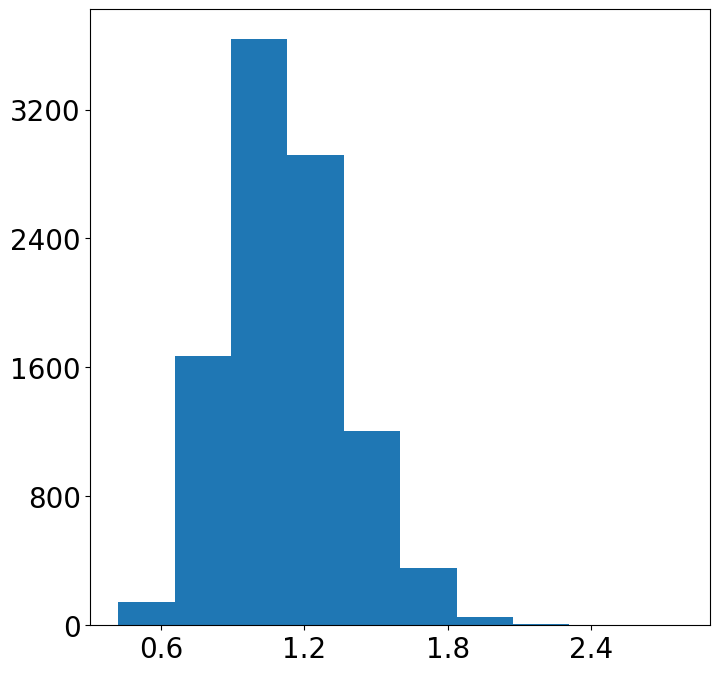

The average is 1.1228142735869275
The median is 1.10181482941478
The standard deviation is 0.25215826095900085


In [24]:
plt.figure(figsize=[8,8])
plt.hist(rmse_sol_sim_ml)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20) 
# Getting the current axes
ax = plt.gca()
# # Setting the number of ticks on the x and y axes
ax.xaxis.set_major_locator(MaxNLocator(nbins=5)) # For x-axis, aiming for 5 ticks
ax.yaxis.set_major_locator(MaxNLocator(nbins=5)) # For y-axis, aiming for 5 ticks  
plt.show()
_,_,_ = provide_stat(rmse_sol_sim_ml)

(3) Transfer Learning

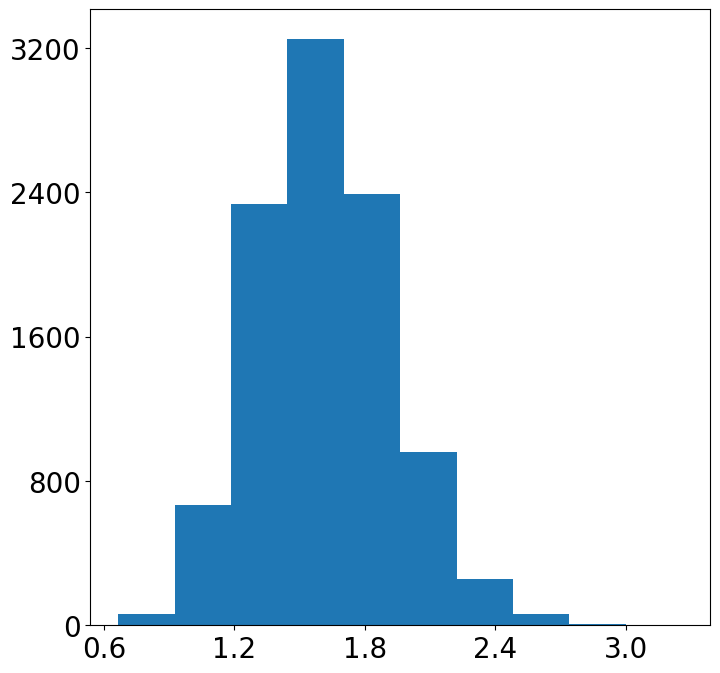

The average is 1.6141362299075488
The median is 1.5967085972394424
The standard deviation is 0.3108108962777125


In [25]:

plt.figure(figsize=[8,8])
plt.hist(rmse_sol_tl)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20) 
# Getting the current axes
ax = plt.gca()
# # Setting the number of ticks on the x and y axes
ax.xaxis.set_major_locator(MaxNLocator(nbins=5)) # For x-axis, aiming for 5 ticks
ax.yaxis.set_major_locator(MaxNLocator(nbins=5)) # For y-axis, aiming for 5 ticks  
plt.show()
_,_,_ = provide_stat(rmse_sol_tl)

Distribution of the differences of RMSEs between Similarity-based Ml and Standard RF: Similarity-based ML - Standard RF

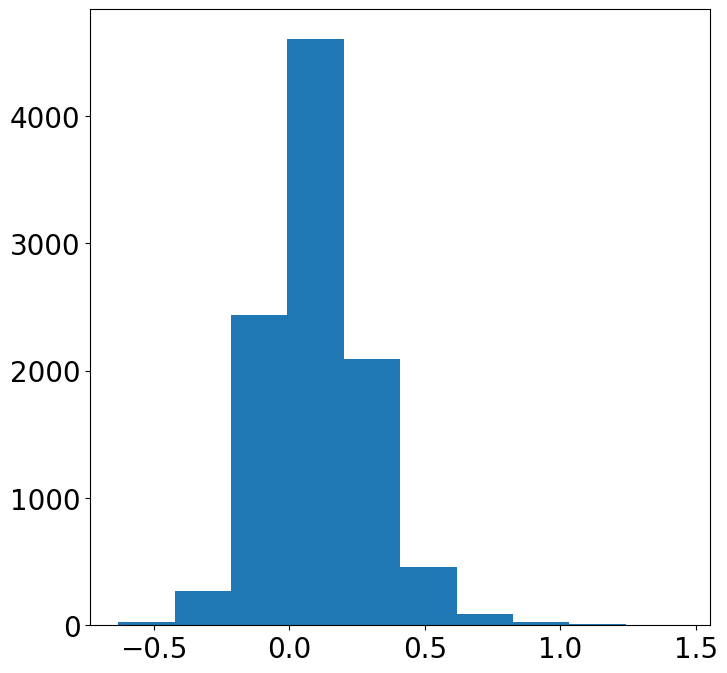

The average is 0.10391975926052535
The median is 0.0894324390083665
The standard deviation is 0.18858159127245416
2894 out of the 10000 instances similarity-based ML was better


In [26]:
plt.figure(figsize=[8,8])
plt.hist(np.array(rmse_sol_sim_ml)  - np.array(rmse_sol_standard_rf))
plt.xticks(fontsize=20)
plt.yticks(fontsize=20) 
# Getting the current axes
ax = plt.gca()

# Setting the number of ticks on the x and y axes
ax.xaxis.set_major_locator(MaxNLocator(nbins=5)) # For x-axis, aiming for 5 ticks
ax.yaxis.set_major_locator(MaxNLocator(nbins=5)) # For y-axis, aiming for 5 ticks     
plt.show()
_,_,_ = provide_stat(np.array(rmse_sol_sim_ml)  - np.array(rmse_sol_standard_rf))
print(f"{len(np.where(np.array(rmse_sol_sim_ml)  - np.array(rmse_sol_standard_rf) < 0)[0])} out of the 10000 instances similarity-based ML was better")

Distirubtion of number of used features for each method

(1) Standard RF

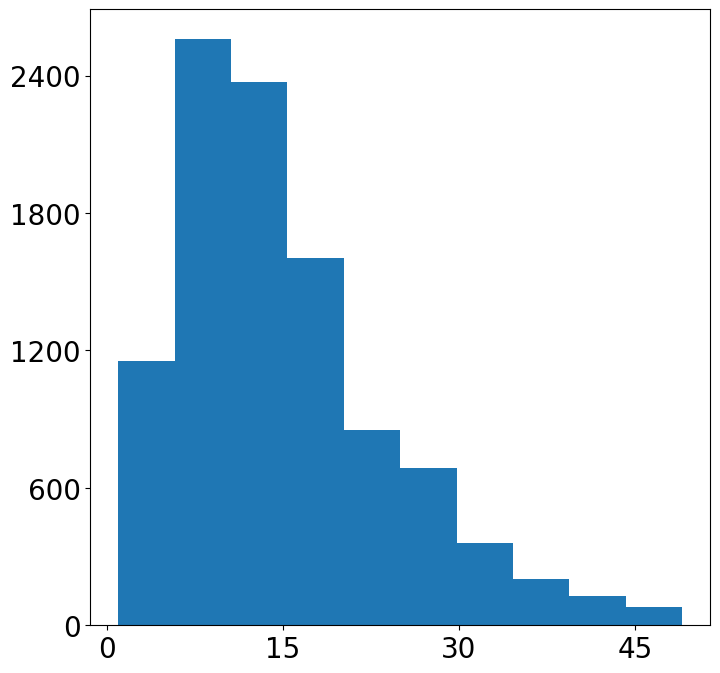

The average is 14.9789
The median is 13.0
The standard deviation is 9.039106968611447


In [27]:
plt.figure(figsize=[8,8])
plt.hist(n_features_sol_standard_rf)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20) 
# Getting the current axes
ax = plt.gca()
# # Setting the number of ticks on the x and y axes
ax.xaxis.set_major_locator(MaxNLocator(nbins=5)) # For x-axis, aiming for 5 ticks
ax.yaxis.set_major_locator(MaxNLocator(nbins=5)) # For y-axis, aiming for 5 ticks  
plt.show()
_,_,_ = provide_stat(n_features_sol_standard_rf)

(2) Similarity-based ML - Group 1

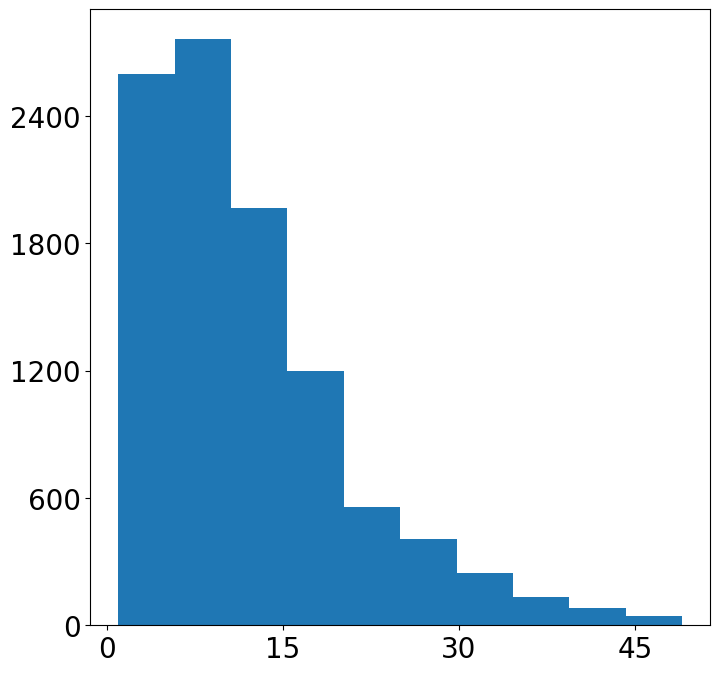

The average is 11.8981
The median is 10.0
The standard deviation is 8.668835930504162


In [28]:
plt.figure(figsize=[8,8])
plt.hist(n_features_sol_sim_ml_group1)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20) 
# Getting the current axes
ax = plt.gca()
# # Setting the number of ticks on the x and y axes
ax.xaxis.set_major_locator(MaxNLocator(nbins=5)) # For x-axis, aiming for 5 ticks
ax.yaxis.set_major_locator(MaxNLocator(nbins=5)) # For y-axis, aiming for 5 ticks  
plt.show()
_,_,_ = provide_stat(n_features_sol_sim_ml_group1)

(3) Similarity-based ML - Group 3

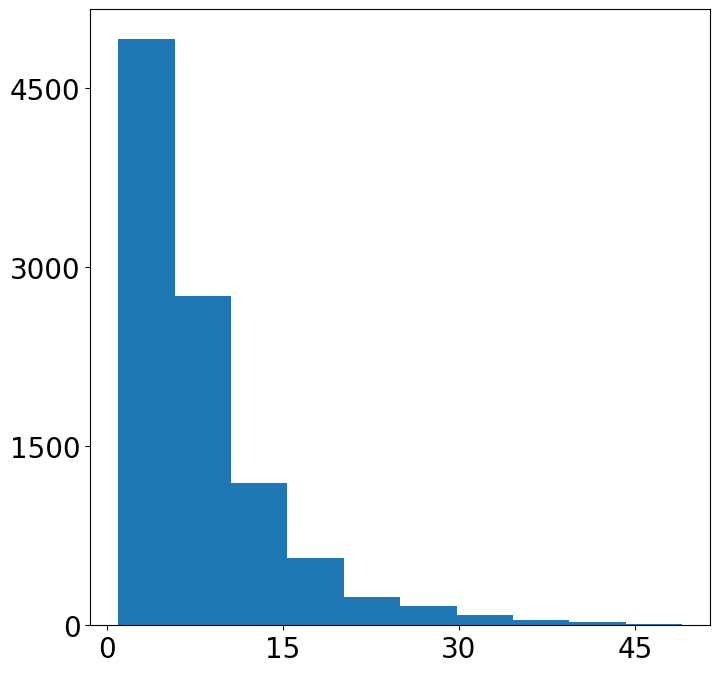

The average is 7.6715
The median is 6.0
The standard deviation is 6.783729634205655


In [29]:
plt.figure(figsize=[8,8])
plt.hist(n_features_sol_sim_ml_group3)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20) 
# Getting the current axes
ax = plt.gca()
# # Setting the number of ticks on the x and y axes
ax.xaxis.set_major_locator(MaxNLocator(nbins=5)) # For x-axis, aiming for 5 ticks
ax.yaxis.set_major_locator(MaxNLocator(nbins=5)) # For y-axis, aiming for 5 ticks  
plt.show()
_,_,_ = provide_stat(n_features_sol_sim_ml_group3)

(4) Transfer Learning

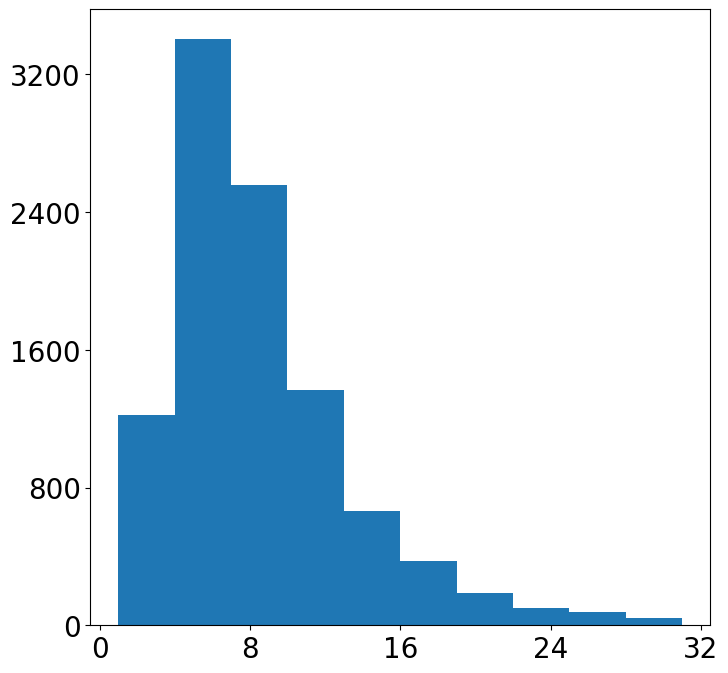

The average is 8.0058
The median is 7.0
The standard deviation is 4.777317904431314


In [30]:
plt.figure(figsize=[8,8])
plt.hist(n_features_sol_tl)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20) 
# Getting the current axes
ax = plt.gca()
# # Setting the number of ticks on the x and y axes
ax.xaxis.set_major_locator(MaxNLocator(nbins=5)) # For x-axis, aiming for 5 ticks
ax.yaxis.set_major_locator(MaxNLocator(nbins=5)) # For y-axis, aiming for 5 ticks  
plt.show()
_,_,_ = provide_stat(n_features_sol_tl)